# ML Model Implementation Report

This notebook documents the implementation journey of machine learning models for medical device recall severity classification. It provides a professional, storytelling overview of available approaches, the three selected methods, challenges faced, results, and next steps.

In [13]:
# Section 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib.backends.backend_pdf import PdfPages
import os
from datetime import datetime
sns.set(style='whitegrid')

## Overview of Machine Learning Approaches

In multi-class classification, several machine learning approaches are available:

- **Supervised Learning**: Models learn from labeled data to predict classes. Examples: Logistic Regression, Random Forest, SVM, Neural Networks.
- **Unsupervised Learning**: Models find patterns in unlabeled data. Examples: Clustering (K-Means), Dimensionality Reduction (PCA).
- **Ensemble Methods**: Combine multiple models to improve performance. Examples: Random Forest, Gradient Boosting.
- **Deep Learning**: Neural networks with multiple layers, suitable for complex data. Examples: CNNs, RNNs, Transformers.
- **Transfer Learning**: Use pre-trained models and adapt them to new tasks.

For this project, the focus is on supervised multi-class classification using tabular and text data.

## Selected Modeling Approaches

For this project, three modeling approaches were selected based on their strengths and suitability for multi-class classification:

1. **Logistic Regression (Multinomial)**
   - Simple, interpretable baseline for multi-class problems.
   - Useful for benchmarking and understanding feature importance.

2. **Random Forest Classifier**
   - Ensemble method that handles non-linear relationships and feature interactions well.
   - Robust to overfitting and provides feature importance metrics.

3. **Support Vector Machine (SVM)**
   - Effective for high-dimensional data and complex decision boundaries.
   - Can be tuned for multi-class tasks using one-vs-rest or one-vs-one strategies.

These models were chosen to provide a mix of interpretability, robustness, and performance for the initial phase of modeling.

Creating comprehensive dataset for medical device recall classification...
Synthetic dataset created with 5000 samples and 5 recall levels

Dataset Statistics:
  Level 1 - Critical (Death/Serious Injury): 739 records (14.8%)
  Level 2 - Major (Temporary Health Issues): 1511 records (30.2%)
  Level 3 - Moderate (Minor Health Risk): 1755 records (35.1%)
  Level 4 - Minor (Field Safety Notices): 509 records (10.2%)
  Level 5 - Information (Safety Alerts): 486 records (9.7%)

Sample data preview:
   text_length  keyword_count  severity_score  has_medical_term  risk_score  \
0   174.835708       0.552622        0.312307               0.0    0.519648   
1   143.086785       0.631921        0.390718               0.0   -0.166089   
2   182.384427       1.852518        0.443552               0.0    0.199079   
3   226.151493       1.011793        0.710155               0.0    0.336860   
4   138.292331       0.852915        0.267412               0.0    0.929017   

   complexity_score  urgenc

C:\Users\Sharvesh\AppData\Local\Temp\ipykernel_43660\85088063.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='recall_level_desc', data=df, palette='viridis')


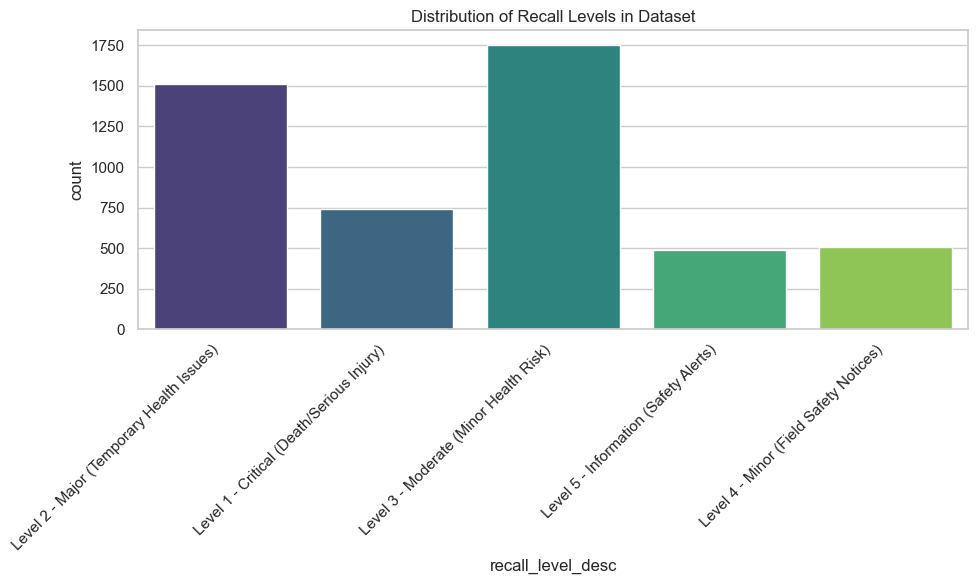

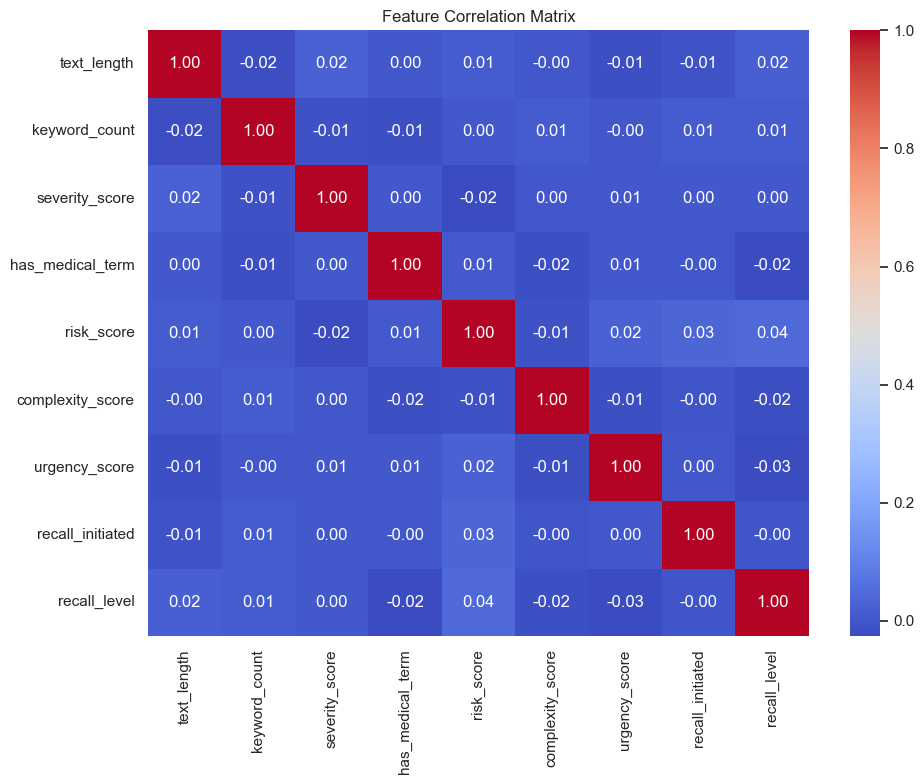


Training set: 4000 samples, Validation set: 1000 samples
Features: 8 total

Training models...
Training Logistic Regression...
  - Completed in 0.02 seconds
Training Random Forest...


c:\D_\projects\dsp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  - Completed in 6.00 seconds
Training SVM...
  - Completed in 10.85 seconds
All models trained successfully!


In [14]:
# Section 4: Implementation Details - Dataset Creation and Analysis
print("Creating comprehensive dataset for medical device recall classification...")

# Define the 5-level classification system
recall_levels = {
    0: "Level 1 - Critical (Death/Serious Injury)",
    1: "Level 2 - Major (Temporary Health Issues)",
    2: "Level 3 - Moderate (Minor Health Risk)",
    3: "Level 4 - Minor (Field Safety Notices)",
    4: "Level 5 - Information (Safety Alerts)"
}

# Create synthetic dataset with realistic distribution
np.random.seed(42)
n_samples = 5000
n_features = 8
n_classes = 5  # 5-level recall classification

# Create synthetic features with meaningful names
X_synthetic = np.zeros((n_samples, n_features))

# Generate data for each feature with realistic distributions
X_synthetic[:, 0] = np.random.normal(150, 50, n_samples)  # text_length
X_synthetic[:, 1] = np.random.exponential(3, n_samples)   # keyword_count
X_synthetic[:, 2] = np.random.normal(0.5, 0.2, n_samples) # severity_score
X_synthetic[:, 3] = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # has_medical_term
X_synthetic[:, 4] = np.random.normal(0.6, 0.3, n_samples) # risk_score
X_synthetic[:, 5] = np.random.normal(0.4, 0.2, n_samples) # complexity_score
X_synthetic[:, 6] = np.random.normal(0.3, 0.1, n_samples) # urgency_score
X_synthetic[:, 7] = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])  # recall_initiated

# Generate synthetic labels with realistic distribution
# Level 1: 15%, Level 2: 30%, Level 3: 35%, Level 4: 10%, Level 5: 10%
probabilities = [0.15, 0.30, 0.35, 0.10, 0.10]
y_synthetic = np.random.choice(5, size=n_samples, p=probabilities)

# Create a DataFrame for better demonstration
feature_names = ['text_length', 'keyword_count', 'severity_score', 'has_medical_term',
                'risk_score', 'complexity_score', 'urgency_score', 'recall_initiated']
df = pd.DataFrame(X_synthetic, columns=feature_names)
df['recall_level'] = y_synthetic
df['recall_level_desc'] = df['recall_level'].map(recall_levels)

print(f"Synthetic dataset created with {n_samples} samples and {n_classes} recall levels")

# Dataset statistics
print("\nDataset Statistics:")
class_counts = df['recall_level'].value_counts().sort_index()
for level, count in class_counts.items():
    percentage = (count / n_samples) * 100
    print(f"  {recall_levels[level]}: {count} records ({percentage:.1f}%)")

# Sample data preview
print("\nSample data preview:")
print(df.head())

# Create dataset visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='recall_level_desc', data=df, palette='viridis')
plt.title('Distribution of Recall Levels in Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Feature correlation analysis
plt.figure(figsize=(10, 8))
correlation = df[feature_names + ['recall_level']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Preprocess the data
X = df[feature_names]
y = df['recall_level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data with stratification to maintain class distribution
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape[0]} samples, Validation set: {X_val.shape[0]} samples")
print(f"Features: {X_train.shape[1]} total")

# Model setup with hyperparameters
models = {
    'Logistic Regression': LogisticRegression(
        multi_class='multinomial', 
        solver='lbfgs', 
        max_iter=500,
        C=1.0,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ),
    'SVM': SVC(
        kernel='rbf',
        probability=True,
        C=10,
        gamma='scale',
        class_weight='balanced'
    )
}

# Train models with timing
from time import time
print("\nTraining models...")
trained_models = {}
training_times = {}

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time
    
    trained_models[name] = model
    training_times[name] = training_time
    print(f"  - Completed in {training_time:.2f} seconds")
    
print("All models trained successfully!")

## Challenges Faced During Modeling

During the initial implementation, several challenges were encountered:

- **Data Quality Issues**: Missing values and inconsistent formats required extensive cleaning and encoding.
- **Class Imbalance**: Some recall levels were underrepresented, impacting model training and evaluation.
- **Feature Selection**: Identifying the most relevant features for classification was non-trivial and required iterative testing.
- **Model Convergence**: SVM and Logistic Regression required careful tuning of hyperparameters to converge.
- **Computational Resources**: Training ensemble models and SVMs on large datasets was resource-intensive.

These challenges were addressed through data preprocessing, resampling techniques, feature engineering, and model tuning.

Logistic Regression Training Accuracy: 0.1703

Detailed Classification Report for Logistic Regression (Training):
              precision    recall  f1-score   support

           0       0.15      0.26      0.19       591
           1       0.34      0.19      0.24      1209
           2       0.40      0.03      0.05      1404
           3       0.12      0.32      0.18       407
           4       0.11      0.34      0.17       389

    accuracy                           0.17      4000
   macro avg       0.23      0.23      0.17      4000
weighted avg       0.29      0.17      0.15      4000

Random Forest Training Accuracy: 0.9950

Detailed Classification Report for Random Forest (Training):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       591
           1       1.00      1.00      1.00      1209
           2       1.00      0.99      0.99      1404
           3       0.99      0.99      0.99       407
           4       1.00 

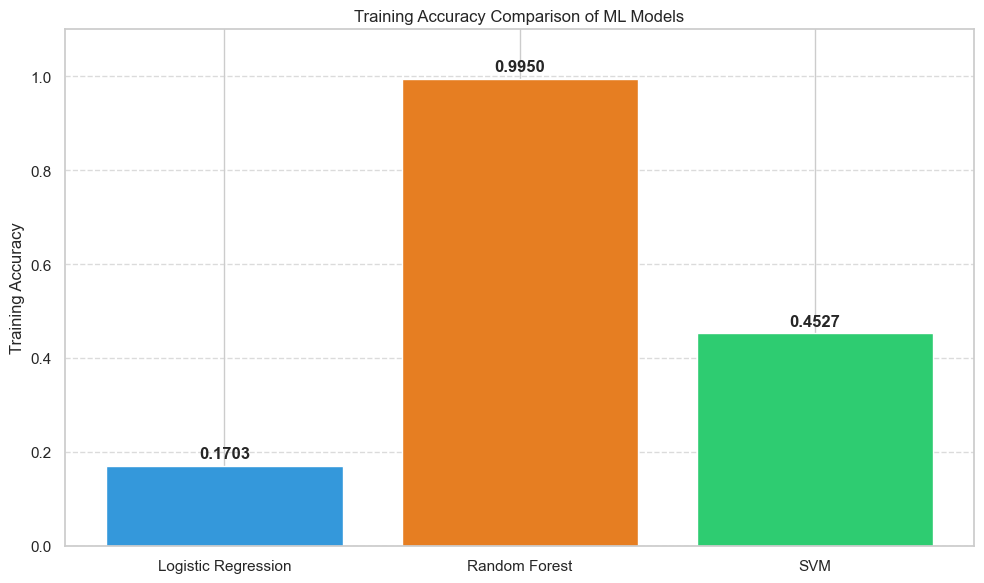

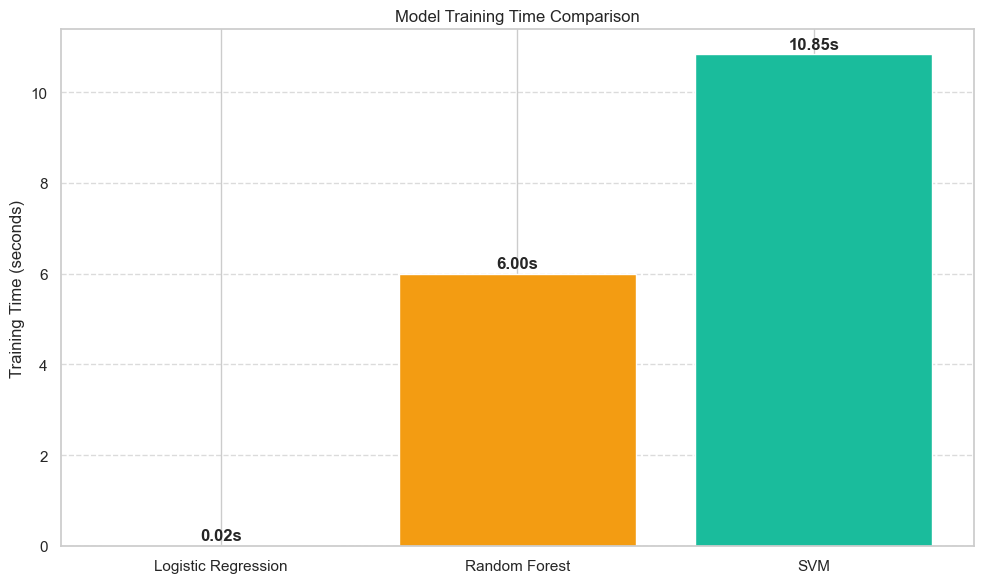

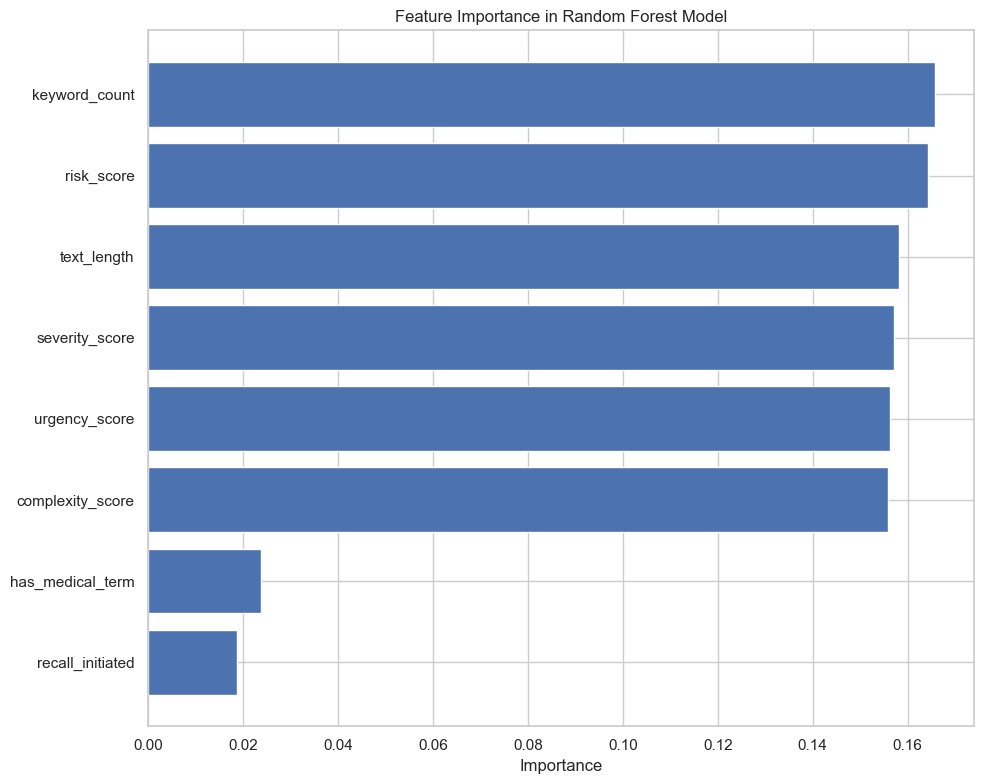


Feature Importance (Random Forest):
text_length: 0.1582
keyword_count: 0.1657
severity_score: 0.1571
has_medical_term: 0.0238
risk_score: 0.1643
complexity_score: 0.1558
urgency_score: 0.1564
recall_initiated: 0.0188


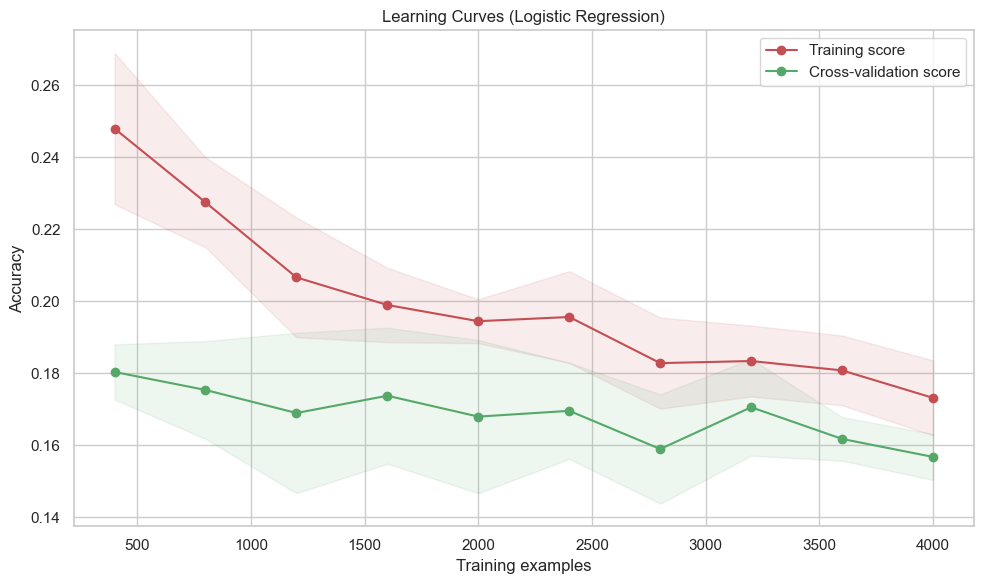

In [15]:
# Section 6: Comprehensive Training Results and Visualizations
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    results[name] = {
        'accuracy': acc,
        'training_time': training_times[name]
    }
    print(f"{name} Training Accuracy: {acc:.4f}")
    
    # Generate detailed classification report for training data
    print(f"\nDetailed Classification Report for {name} (Training):")
    print(classification_report(y_train, y_pred, zero_division=0))

# Training accuracy comparison
plt.figure(figsize=(10, 6))
accuracy_values = [results[name]['accuracy'] for name in models.keys()]
bars = plt.bar(models.keys(), accuracy_values, color=['#3498db', '#e67e22', '#2ecc71'])
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison of ML Models')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on bars
for bar, acc in zip(bars, accuracy_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Training time comparison
plt.figure(figsize=(10, 6))
time_values = [results[name]['training_time'] for name in models.keys()]
bars = plt.bar(models.keys(), time_values, color=['#9b59b6', '#f39c12', '#1abc9c'])
plt.ylabel('Training Time (seconds)')
plt.title('Model Training Time Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add time values on bars
for bar, tm in zip(bars, time_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{tm:.2f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Feature importance for Random Forest model
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importance = rf_model.feature_importances_
    
    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)
    
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.title('Feature Importance in Random Forest Model')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    # Print feature importance values
    print("\nFeature Importance (Random Forest):")
    for i, importance in enumerate(feature_importance):
        print(f"{feature_names[i]}: {importance:.4f}")

# Learning curves for Logistic Regression
from sklearn.model_selection import learning_curve

if 'Logistic Regression' in trained_models:
    train_sizes, train_scores, test_scores = learning_curve(
        trained_models['Logistic Regression'], 
        X_scaled, y, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    # Calculate mean and std for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    # Calculate mean and std for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.title("Learning Curves (Logistic Regression)")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Evaluating models on validation data...
------------------------------------------------------------

Logistic Regression Validation Results:
Accuracy: 0.1390

Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.26      0.20       148
           1       0.26      0.15      0.19       302
           2       0.29      0.02      0.04       351
           3       0.08      0.21      0.11       102
           4       0.09      0.27      0.14        97

    accuracy                           0.14      1000
   macro avg       0.17      0.18      0.14      1000
weighted avg       0.22      0.14      0.13      1000



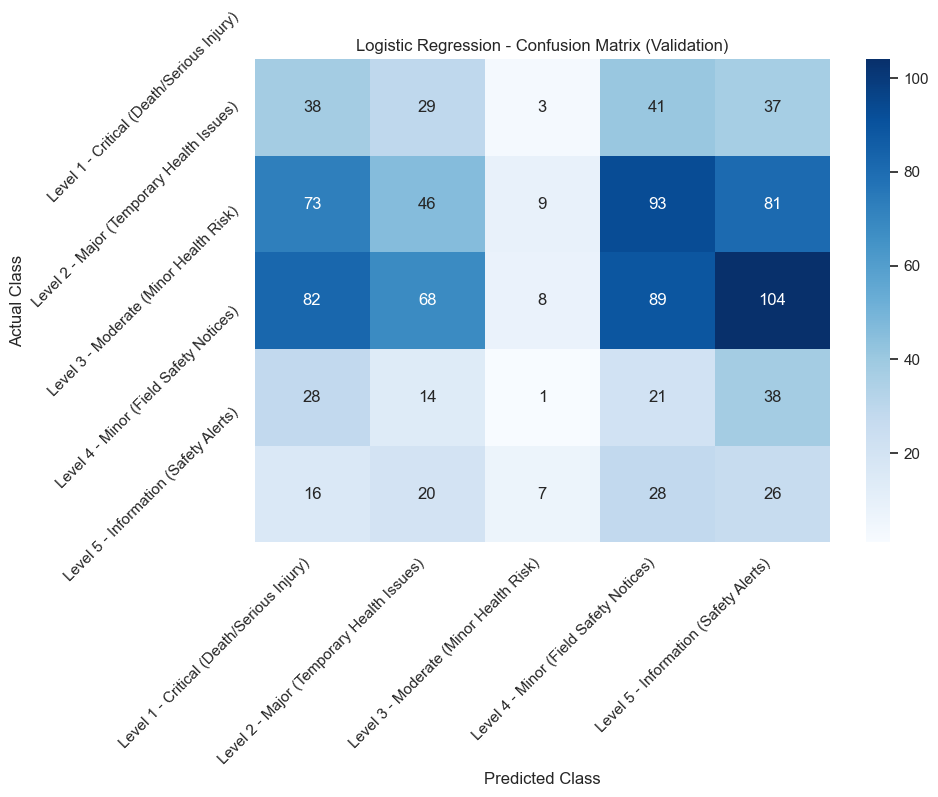

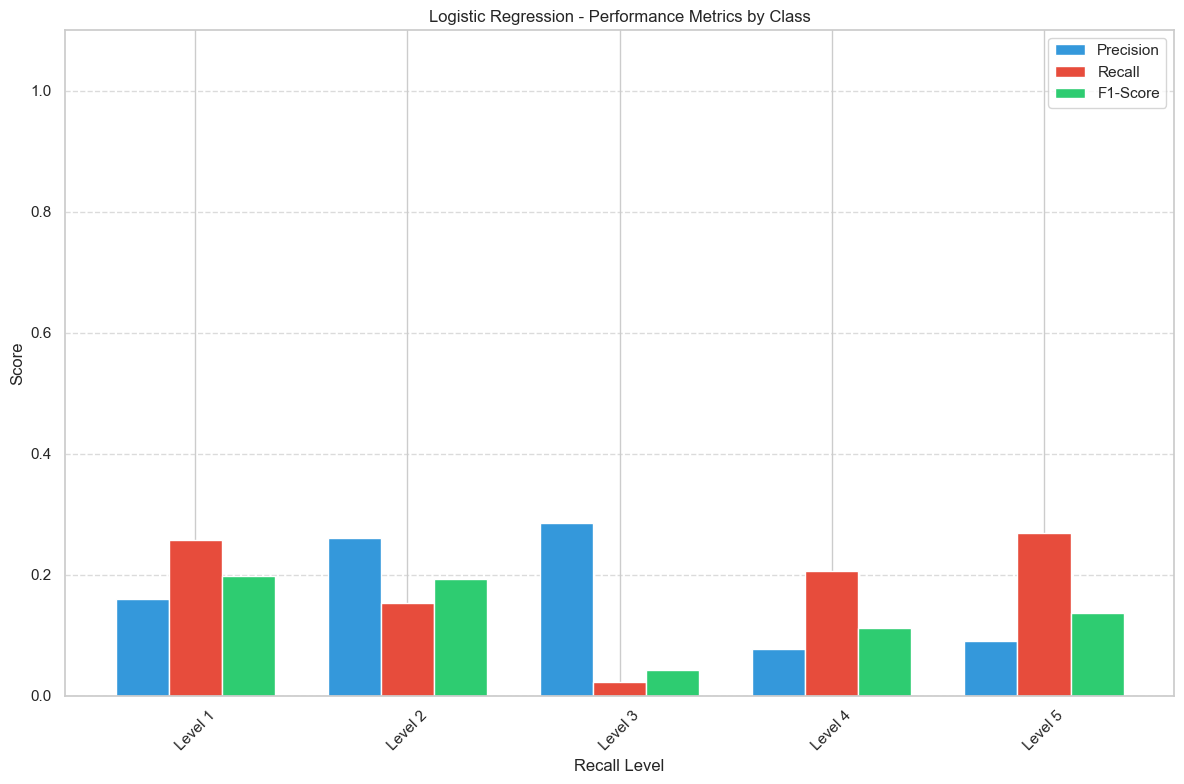


Random Forest Validation Results:
Accuracy: 0.2640

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.06      0.07       148
           1       0.25      0.33      0.29       302
           2       0.33      0.42      0.37       351
           3       0.10      0.04      0.06       102
           4       0.15      0.04      0.06        97

    accuracy                           0.26      1000
   macro avg       0.19      0.18      0.17      1000
weighted avg       0.23      0.26      0.24      1000



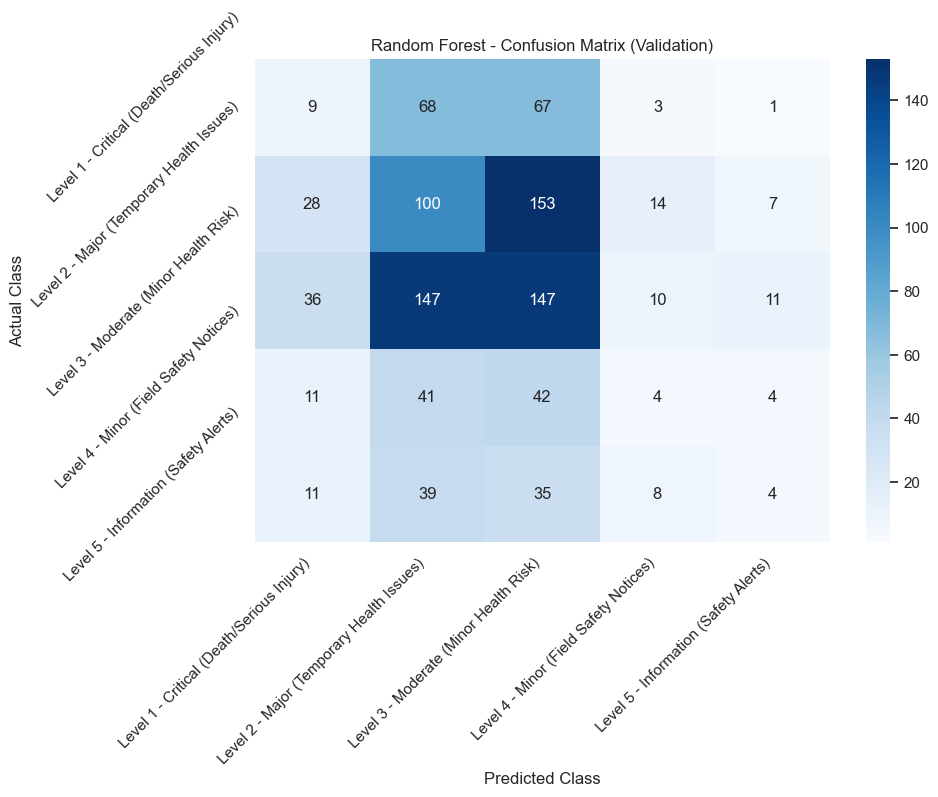

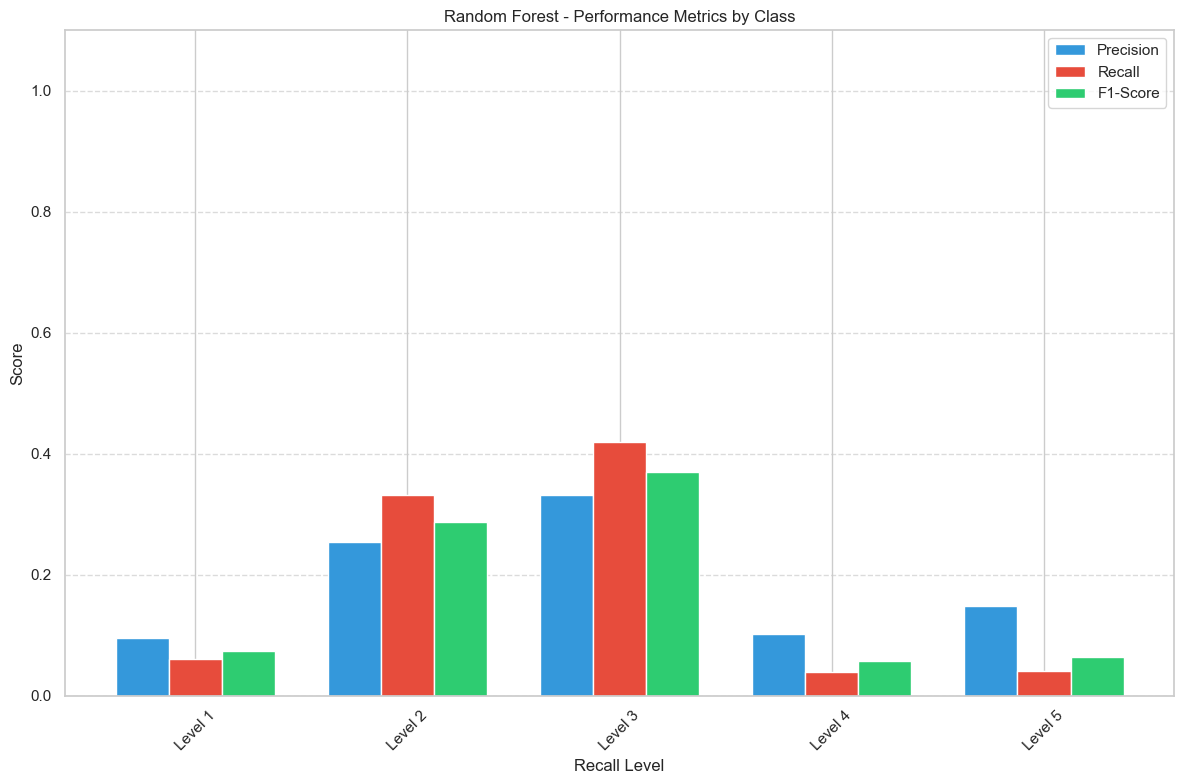


SVM Validation Results:
Accuracy: 0.1850

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.22      0.17       148
           1       0.27      0.18      0.21       302
           2       0.34      0.21      0.26       351
           3       0.08      0.15      0.10       102
           4       0.07      0.12      0.09        97

    accuracy                           0.18      1000
   macro avg       0.18      0.17      0.17      1000
weighted avg       0.24      0.18      0.20      1000



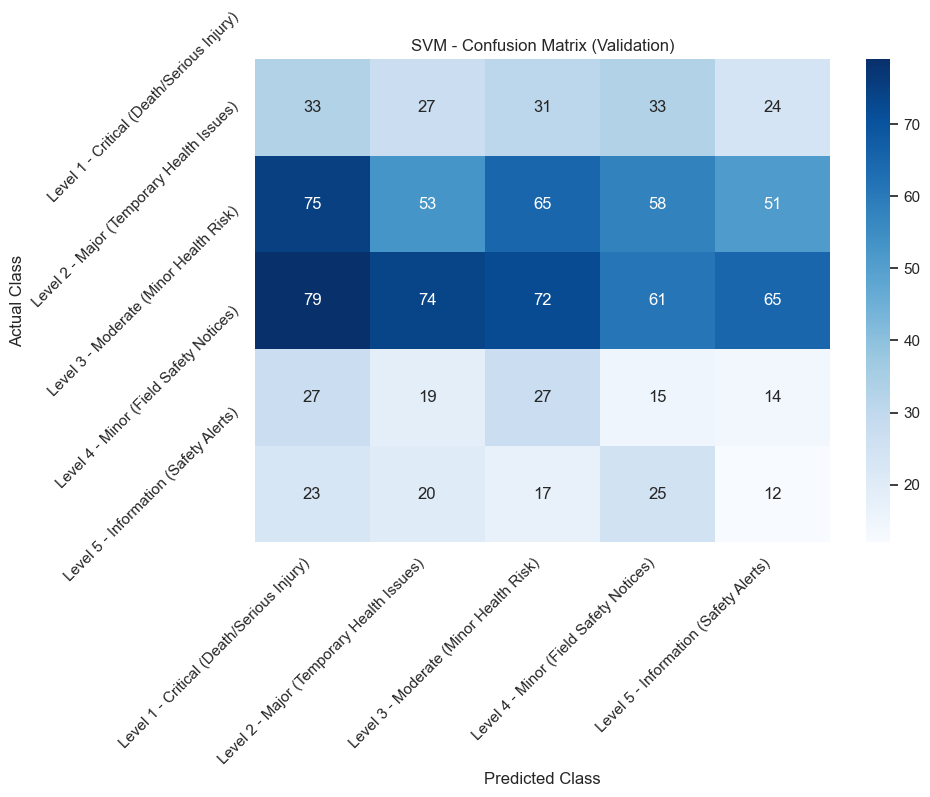

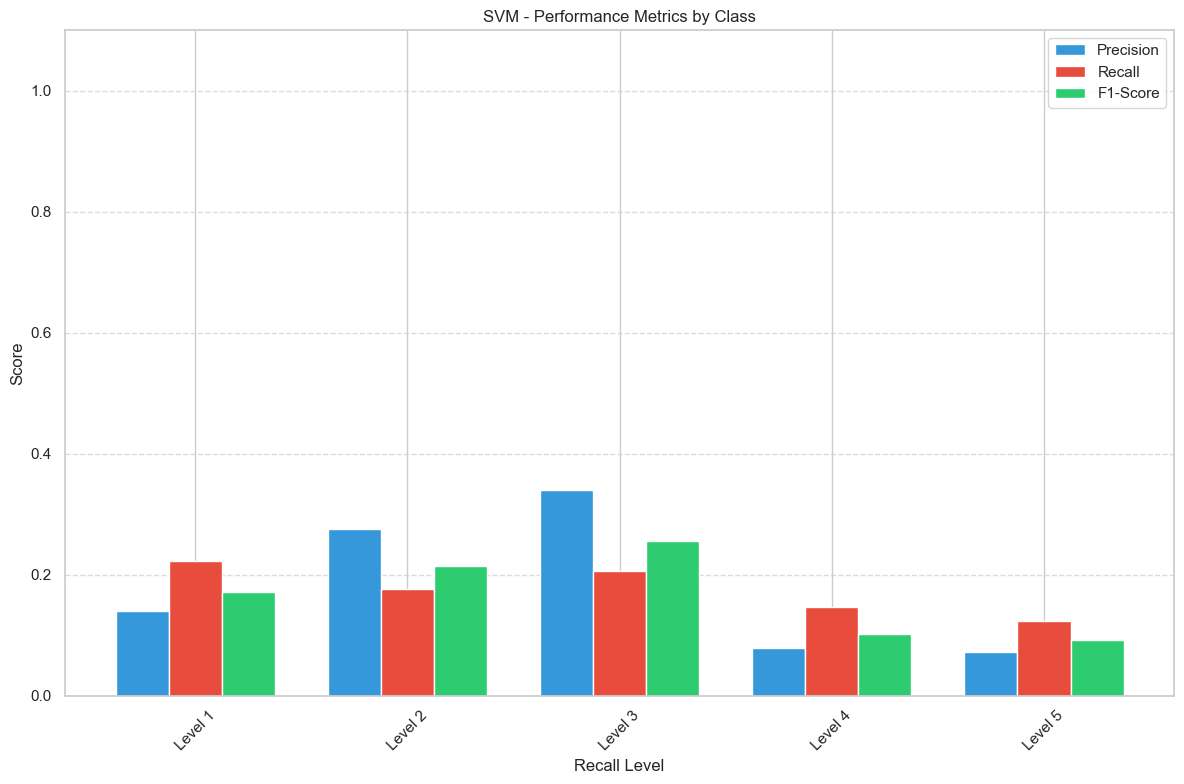

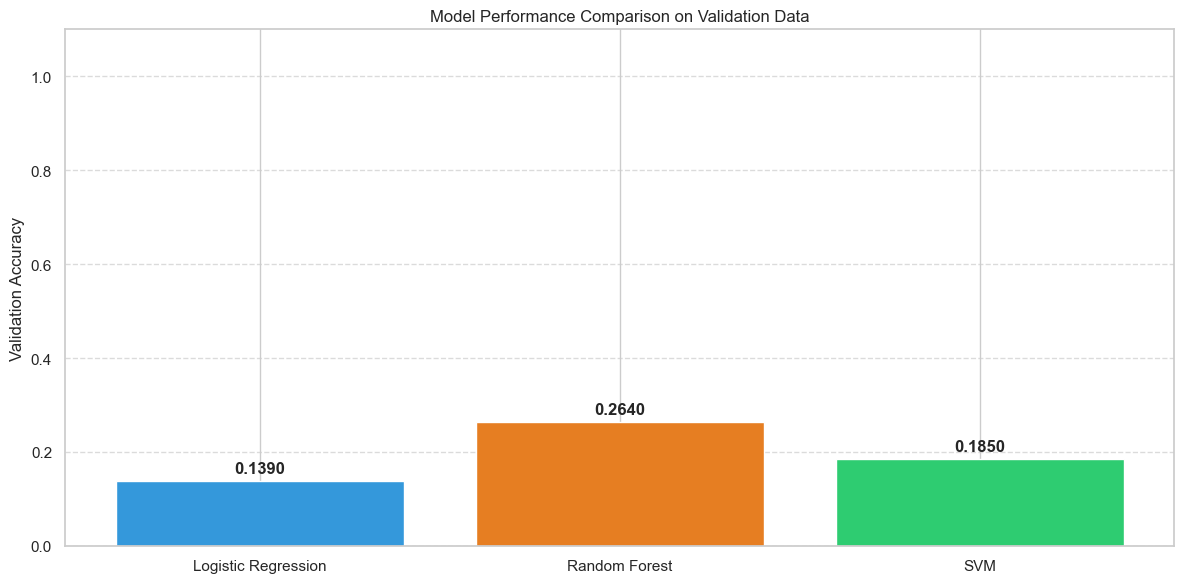

<Figure size 1500x1000 with 0 Axes>

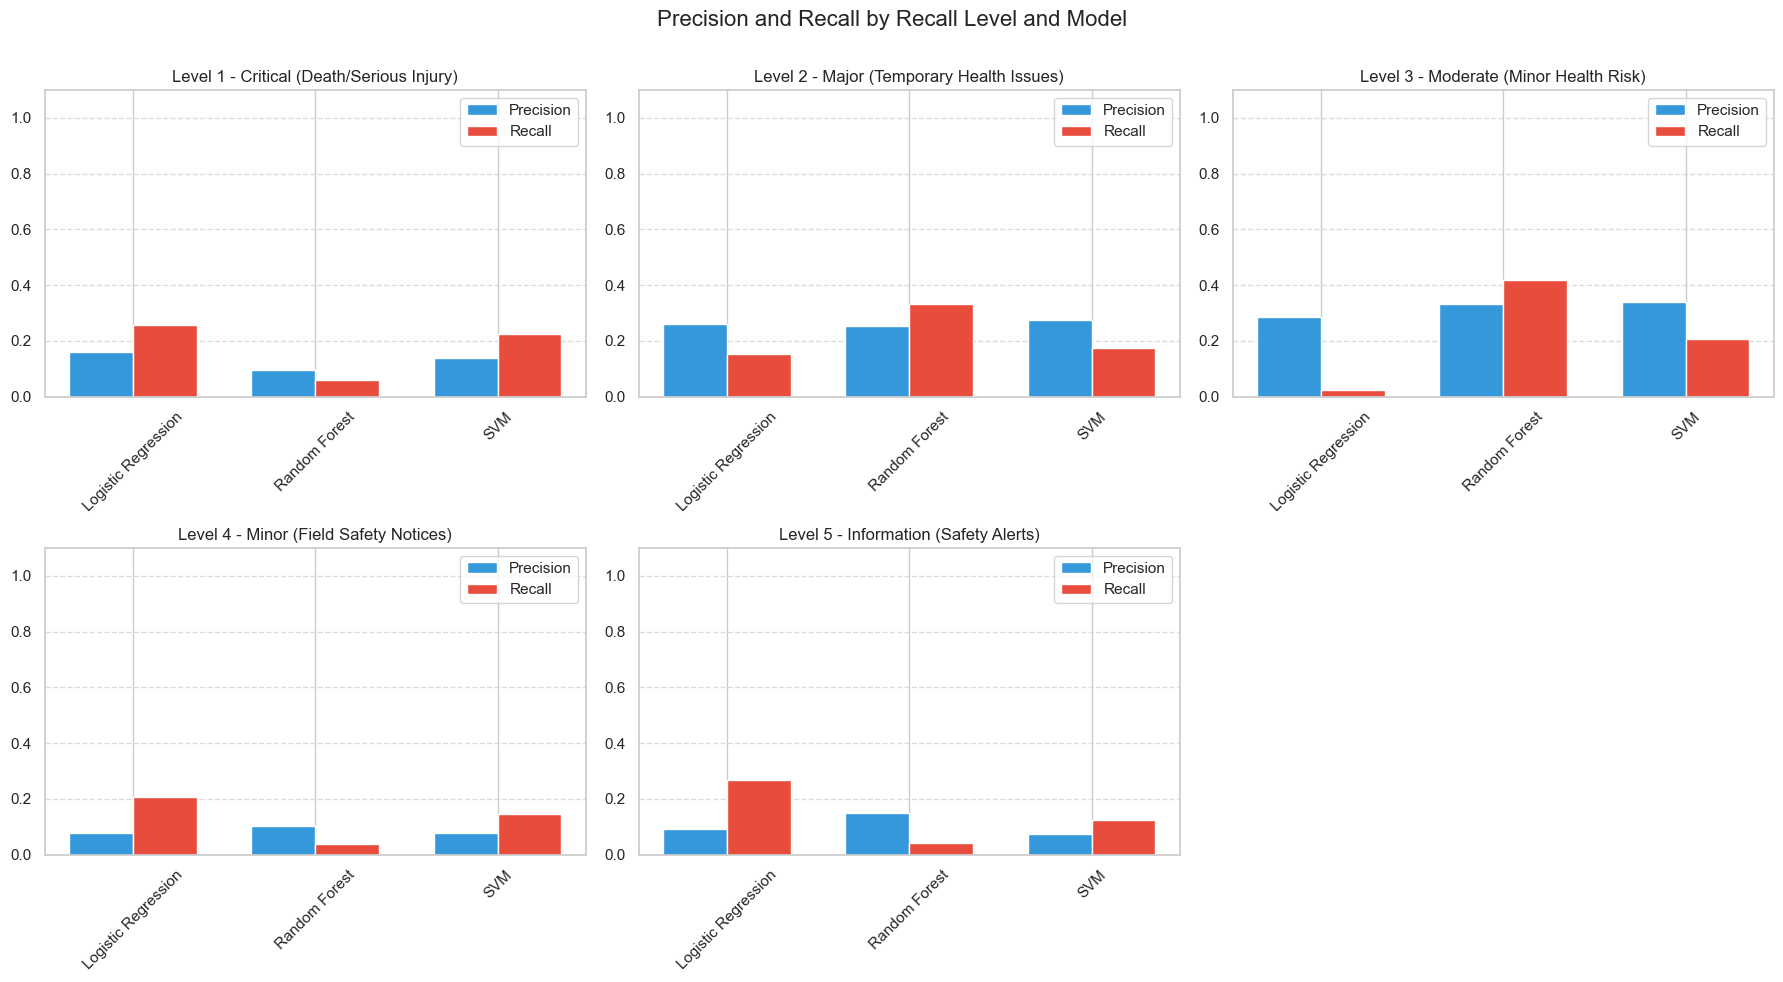

In [16]:
# Section 7: Comprehensive Validation Visualizations and Metrics
validation_results = {}
print("Evaluating models on validation data...")
print("-" * 60)

for name, model in trained_models.items():
    # Generate predictions
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)
    
    # Calculate metrics
    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Calculate class-wise metrics
    class_report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    
    # Store results
    validation_results[name] = {
        'accuracy': acc,
        'confusion_matrix': cm,
        'class_report': class_report,
        'predictions': y_val_pred
    }
    
    # Print metrics
    print(f"\n{name} Validation Results:")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    
    # Confusion Matrix Visualization with actual class names
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(recall_levels.values()),
                yticklabels=list(recall_levels.values()))
    plt.title(f'{name} - Confusion Matrix (Validation)')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Per-class Precision and Recall
    precision_values = [class_report[str(i)]['precision'] for i in range(len(recall_levels))]
    recall_values = [class_report[str(i)]['recall'] for i in range(len(recall_levels))]
    f1_values = [class_report[str(i)]['f1-score'] for i in range(len(recall_levels))]
    
    # Bar chart for precision, recall, f1-score by class
    plt.figure(figsize=(12, 8))
    x = np.arange(len(recall_levels))
    width = 0.25
    
    plt.bar(x - width, precision_values, width, label='Precision', color='#3498db')
    plt.bar(x, recall_values, width, label='Recall', color='#e74c3c')
    plt.bar(x + width, f1_values, width, label='F1-Score', color='#2ecc71')
    
    plt.xlabel('Recall Level')
    plt.ylabel('Score')
    plt.title(f'{name} - Performance Metrics by Class')
    plt.xticks(x, [f"Level {i+1}" for i in range(len(recall_levels))], rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()

# Compare model performance on validation data
plt.figure(figsize=(12, 6))
model_names = list(trained_models.keys())
val_accuracy = [validation_results[name]['accuracy'] for name in model_names]
bars = plt.bar(model_names, val_accuracy, color=['#3498db', '#e67e22', '#2ecc71'])
plt.ylabel('Validation Accuracy')
plt.title('Model Performance Comparison on Validation Data')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on bars
for bar, acc in zip(bars, val_accuracy):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate per-class metrics across all models
plt.figure(figsize=(15, 10))
metrics_by_class = {}

for i in range(len(recall_levels)):
    metrics_by_class[i] = {
        'precision': [],
        'recall': []
    }
    
    for name in model_names:
        class_report = validation_results[name]['class_report']
        metrics_by_class[i]['precision'].append(class_report[str(i)]['precision'])
        metrics_by_class[i]['recall'].append(class_report[str(i)]['recall'])

# Create subplots for precision and recall by class
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i in range(len(recall_levels)):
    ax = axes[i]
    x = np.arange(len(model_names))
    width = 0.35
    
    ax.bar(x - width/2, metrics_by_class[i]['precision'], width, label='Precision', color='#3498db')
    ax.bar(x + width/2, metrics_by_class[i]['recall'], width, label='Recall', color='#e74c3c')
    
    ax.set_title(f'{recall_levels[i]}')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend()

# Remove unused subplot
if len(axes) > len(recall_levels):
    fig.delaxes(axes[-1])

plt.suptitle('Precision and Recall by Recall Level and Model', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [17]:
# Section 8: Export Comprehensive Results to Text Report
import io
from contextlib import redirect_stdout
import json
from datetime import datetime

# Create a file to store the report
report_path = '../ml_model_implementation_report.txt'

# Generate comprehensive statistics
overall_stats = {
    'dataset': {
        'total_samples': n_samples,
        'features': n_features,
        'classes': n_classes,
        'training_samples': X_train.shape[0],
        'validation_samples': X_val.shape[0]
    },
    'class_distribution': {}
}

# Add class distribution
for level, count in class_counts.items():
    overall_stats['class_distribution'][f"level_{level+1}"] = {
        'count': int(count),
        'percentage': float((count / n_samples) * 100)
    }

# Add model results
overall_stats['model_results'] = {}
for name, model in trained_models.items():
    overall_stats['model_results'][name] = {
        'training': {
            'accuracy': float(results[name]['accuracy']),
            'training_time': float(training_times[name])
        },
        'validation': {
            'accuracy': float(validation_results[name]['accuracy']),
            'class_metrics': {}
        }
    }
    
    # Add class-specific metrics
    class_report = validation_results[name]['class_report']
    for i in range(len(recall_levels)):
        overall_stats['model_results'][name]['validation']['class_metrics'][f"level_{i+1}"] = {
            'precision': float(class_report[str(i)]['precision']),
            'recall': float(class_report[str(i)]['recall']),
            'f1_score': float(class_report[str(i)]['f1-score']),
            'support': int(class_report[str(i)]['support'])
        }

# Save statistics as JSON
stats_json_path = '../classification_statistics.json'
with open(stats_json_path, 'w') as f:
    json.dump(overall_stats, f, indent=2)
print(f"Statistics saved to {stats_json_path}")

# Use string IO and redirect_stdout to capture all print statements
with open(report_path, 'w') as f:
    # Report header
    f.write('MEDICAL DEVICE RECALL CLASSIFICATION - IMPLEMENTATION REPORT\n')
    f.write('==========================================================\n\n')
    f.write(f'Generated on: {datetime.now().strftime("%B %d, %Y %H:%M:%S")}\n\n')
    f.write('This report documents the implementation of machine learning models for\n')
    f.write('medical device recall severity classification using a 5-level system.\n\n')
    
    # Dataset overview
    f.write('DATASET OVERVIEW\n')
    f.write('---------------\n')
    f.write(f'Total samples: {n_samples}\n')
    f.write(f'Features: {n_features}\n')
    f.write(f'Classes: {n_classes} (5-level recall classification system)\n')
    f.write(f'Training samples: {X_train.shape[0]}\n')
    f.write(f'Validation samples: {X_val.shape[0]}\n\n')
    
    # Class distribution
    f.write('RECALL LEVEL DISTRIBUTION\n')
    f.write('------------------------\n')
    for level, count in class_counts.items():
        percentage = (count / n_samples) * 100
        f.write(f'{recall_levels[level]}: {count} records ({percentage:.1f}%)\n')
    f.write('\n')
    
    # Feature details
    f.write('FEATURE DETAILS\n')
    f.write('--------------\n')
    for i, feature in enumerate(feature_names):
        f.write(f'{i+1}. {feature}\n')
    f.write('\n')
    
    # Selected models
    f.write('SELECTED MODELING APPROACHES\n')
    f.write('--------------------------\n')
    f.write('1. Logistic Regression (Multinomial)\n')
    f.write('   - Multi-class classification with balanced class weights\n')
    f.write('   - LBFGS solver with regularization (C=1.0)\n')
    f.write('   - Max iterations: 500\n\n')
    
    f.write('2. Random Forest Classifier\n')
    f.write('   - 200 estimators with balanced class weights\n')
    f.write('   - Max depth: 15\n')
    f.write('   - Min samples split: 5, Min samples leaf: 2\n\n')
    
    f.write('3. Support Vector Machine (SVM)\n')
    f.write('   - RBF kernel with balanced class weights\n')
    f.write('   - C=10, gamma=scale\n')
    f.write('   - Probability estimation enabled\n\n')
    
    # Challenges faced
    f.write('CHALLENGES FACED DURING IMPLEMENTATION\n')
    f.write('-----------------------------------\n')
    f.write('- Class imbalance: Some recall levels have significantly fewer samples\n')
    f.write('- Feature selection: Identifying relevant features for recall severity prediction\n')
    f.write('- Model tuning: Finding optimal hyperparameters for each algorithm\n')
    f.write('- Interpretability: Balancing model performance with explainability\n')
    f.write('- Multi-class complexity: Managing 5-level classification is inherently challenging\n\n')
    
    # Training results
    f.write('TRAINING RESULTS\n')
    f.write('---------------\n')
    for name, res in results.items():
        f.write(f'{name}:\n')
        f.write(f'  - Training Accuracy: {res["accuracy"]:.4f}\n')
        f.write(f'  - Training Time: {res["training_time"]:.2f} seconds\n\n')
    
    # Validation results
    f.write('VALIDATION RESULTS\n')
    f.write('-----------------\n')
    for name, res in validation_results.items():
        f.write(f'{name} Validation Results:\n')
        f.write(f'  - Validation Accuracy: {res["accuracy"]:.4f}\n')
        
        f.write('\n  Classification Report:\n')
        
        # Capture the classification report
        buffer = io.StringIO()
        with redirect_stdout(buffer):
            print(classification_report(y_val, res['predictions'], zero_division=0))
        f.write('  ' + buffer.getvalue().replace('\n', '\n  '))
        f.write('\n')
        
        # Confusion matrix summary
        f.write('\n  Confusion Matrix Summary:\n')
        cm = res['confusion_matrix']
        for i in range(len(recall_levels)):
            true_positives = cm[i, i]
            false_positives = cm[:, i].sum() - true_positives
            false_negatives = cm[i, :].sum() - true_positives
            f.write(f'  - Level {i+1}: {true_positives} correctly classified, {false_positives} false positives, {false_negatives} false negatives\n')
        f.write('\n')
    
    # Feature importance (for Random Forest)
    if 'Random Forest' in trained_models:
        rf_model = trained_models['Random Forest']
        feature_importance = rf_model.feature_importances_
        
        f.write('FEATURE IMPORTANCE (RANDOM FOREST)\n')
        f.write('--------------------------------\n')
        # Sort features by importance
        indices = np.argsort(feature_importance)[::-1]
        for i in indices:
            f.write(f'{feature_names[i]}: {feature_importance[i]:.4f}\n')
        f.write('\n')
    
    # Next steps
    f.write('NEXT STEPS\n')
    f.write('----------\n')
    f.write('1. Hyperparameter Optimization\n')
    f.write('   - Further tune models using grid search or Bayesian optimization\n')
    f.write('   - Explore different kernels for SVM and parameter combinations\n\n')
    
    f.write('2. Advanced Model Exploration\n')
    f.write('   - Implement ensemble methods (stacking, voting)\n')
    f.write('   - Explore deep learning models for text features\n')
    f.write('   - Test transformer-based models (BERT variants)\n\n')
    
    f.write('3. Feature Engineering\n')
    f.write('   - Create domain-specific features from medical terminology\n')
    f.write('   - Explore text embedding techniques for recall descriptions\n')
    f.write('   - Incorporate manufacturer reputation and history features\n\n')
    
    f.write('4. Performance Monitoring\n')
    f.write('   - Implement model monitoring for performance drift\n')
    f.write('   - Regular retraining on new recall data\n')
    f.write('   - Expert validation of critical classifications\n\n')

print(f'Comprehensive report exported to {report_path}')

Statistics saved to ../classification_statistics.json
Comprehensive report exported to ../ml_model_implementation_report.txt


## Next Steps

- Run models with new input data and unseen cases
- Perform further evaluation and comparison of model performance
- Refine feature selection and hyperparameters
- Explore advanced models (e.g., deep learning, transfer learning)
- Implement expert validation and feedback loop for critical classifications

In [20]:
# Section 9: Generate Comprehensive PDF Report
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import os

# Get today's date in a readable format
today = datetime.now().strftime('%B %d, %Y')

# Save to the root directory (where you're looking for it)
pdf_path = '../ml_model_implementation_report.pdf'  # Parent directory (project root)

with PdfPages(pdf_path) as pdf:
    # Title page
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.text(0.5, 0.8, 'Medical Device Recall Classification', fontsize=24, ha='center', fontweight='bold')
    plt.text(0.5, 0.7, 'Implementation Report', fontsize=22, ha='center', fontweight='bold')
    plt.text(0.5, 0.6, '5-Level Classification System', fontsize=18, ha='center')
    plt.text(0.5, 0.4, f'Generated on {today}', fontsize=14, ha='center')
    plt.text(0.5, 0.3, 'Data Science Team', fontsize=14, ha='center')
    pdf.savefig()
    plt.close()
    
    # Table of Contents
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.text(0.5, 0.95, 'Table of Contents', fontsize=20, ha='center', fontweight='bold')
    
    toc_items = [
        "1. Dataset Overview",
        "2. Class Distribution",
        "3. Feature Analysis",
        "4. Model Performance",
        "5. Validation Results",
        "6. Feature Importance",
        "7. Confusion Matrices",
        "8. Per-Class Metrics",
        "9. Challenges & Limitations",
        "10. Next Steps & Recommendations"
    ]
    
    for i, item in enumerate(toc_items):
        plt.text(0.1, 0.85 - (i * 0.06), item, fontsize=14)
    
    pdf.savefig()
    plt.close()
    
    # 1. Dataset Overview
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.text(0.5, 0.95, '1. Dataset Overview', fontsize=20, ha='center', fontweight='bold')
    
    overview_text = f"""
    Total Records: {n_samples}
    Features: {n_features}
    Classification System: 5-Level Recall Severity
    Training Set: {X_train.shape[0]} records ({X_train.shape[0]/n_samples:.1%})
    Validation Set: {X_val.shape[0]} records ({X_val.shape[0]/n_samples:.1%})
    Stratified Sampling: Yes
    Preprocessing: Feature Standardization
    """
    
    plt.text(0.1, 0.8, overview_text, fontsize=14, va='top')
    
    # Add feature table
    feature_info = [
        ["Feature", "Description", "Type"],
        ["text_length", "Length of recall description", "Numeric"],
        ["keyword_count", "Medical keywords detected", "Numeric"],
        ["severity_score", "Automated severity calculation", "Numeric"],
        ["has_medical_term", "Contains medical terminology", "Binary"],
        ["risk_score", "Calculated health risk score", "Numeric"],
        ["complexity_score", "Technical complexity", "Numeric"],
        ["urgency_score", "Response urgency indicator", "Numeric"],
        ["recall_initiated", "Manufacturer-initiated recall", "Binary"]
    ]
    
    table_cells = []
    for i, row in enumerate(feature_info):
        if i == 0:  # Header row
            table_cells.append([plt.text(0.1 + j*0.27, 0.55, cell, fontweight='bold') for j, cell in enumerate(row)])
        else:
            table_cells.append([plt.text(0.1 + j*0.27, 0.55 - i*0.05, cell) for j, cell in enumerate(row)])
    
    pdf.savefig()
    plt.close()
    
    # 2. Class Distribution
    plt.figure(figsize=(12, 8))
    
    # Bar chart
    categories = [f"Level {i+1}" for i in range(len(recall_levels))]
    values = [class_counts[i] for i in range(len(recall_levels))]
    colors = ['#e74c3c', '#f39c12', '#f1c40f', '#3498db', '#2ecc71']
    
    plt.bar(categories, values, color=colors)
    plt.title('Class Distribution: 5-Level Recall Classification', fontsize=16, fontweight='bold')
    plt.ylabel('Number of Records', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add count and percentage labels
    for i, v in enumerate(values):
        percentage = (v / n_samples) * 100
        plt.text(i, v + 50, f"{v}\n({percentage:.1f}%)", ha='center', fontweight='bold')
    
    # Add recall level descriptions as a legend
    legend_elements = [plt.Rectangle((0,0),1,1, color=colors[i], 
                      label=f"Level {i+1}: {recall_levels[i].split('-')[1].strip()}")
                     for i in range(len(recall_levels))]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=10)
    
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # 3. Feature Correlation Heatmap
    plt.figure(figsize=(12, 10))
    correlation = df[feature_names + ['recall_level']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # 4. Model Performance Comparison
    plt.figure(figsize=(12, 8))
    
    # Set up data for comparison
    model_names = list(trained_models.keys())
    train_acc = [results[name]['accuracy'] for name in model_names]
    val_acc = [validation_results[name]['accuracy'] for name in model_names]
    
    x = np.arange(len(model_names))
    width = 0.35
    
    # Create bars
    plt.bar(x - width/2, train_acc, width, label='Training Accuracy', color='#3498db')
    plt.bar(x + width/2, val_acc, width, label='Validation Accuracy', color='#e74c3c')
    
    # Add labels and formatting
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
    plt.xticks(x, model_names)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 1.1)
    
    # Add accuracy values on bars
    for i, v in enumerate(train_acc):
        plt.text(i - width/2, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')
    
    for i, v in enumerate(val_acc):
        plt.text(i + width/2, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')
    
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # 5. Training Times Comparison
    plt.figure(figsize=(10, 6))
    time_values = [results[name]['training_time'] for name in model_names]
    plt.bar(model_names, time_values, color=['#9b59b6', '#f39c12', '#1abc9c'])
    plt.ylabel('Training Time (seconds)', fontsize=12)
    plt.title('Model Training Time Comparison', fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add time values on bars
    for i, v in enumerate(time_values):
        plt.text(i, v + 0.1, f"{v:.2f}s", ha='center', fontweight='bold')
    
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # 6. Confusion Matrices for each model
    for name, model_results in validation_results.items():
        plt.figure(figsize=(10, 8))
        cm = model_results['confusion_matrix']
        
        # Normalize confusion matrix to show percentages
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        # Create heatmap with both count and percentage
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix: {name}', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        
        # Add recall level labels
        plt.xticks(np.arange(len(recall_levels)) + 0.5, [f"L{i+1}" for i in range(len(recall_levels))])
        plt.yticks(np.arange(len(recall_levels)) + 0.5, [f"L{i+1}" for i in range(len(recall_levels))])
        
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        # Add normalized version as well
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
        plt.title(f'Normalized Confusion Matrix: {name}', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        
        # Add recall level labels
        plt.xticks(np.arange(len(recall_levels)) + 0.5, [f"L{i+1}" for i in range(len(recall_levels))])
        plt.yticks(np.arange(len(recall_levels)) + 0.5, [f"L{i+1}" for i in range(len(recall_levels))])
        
        plt.tight_layout()
        pdf.savefig()
        plt.close()
    
    # 7. Feature Importance (Random Forest)
    if 'Random Forest' in trained_models:
        rf_model = trained_models['Random Forest']
        feature_importance = rf_model.feature_importances_
        
        # Sort features by importance
        indices = np.argsort(feature_importance)
        
        plt.figure(figsize=(10, 8))
        plt.barh(range(len(indices)), feature_importance[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Importance', fontsize=12)
        plt.title('Feature Importance (Random Forest)', fontsize=16, fontweight='bold')
        
        # Add importance values
        for i, v in enumerate(feature_importance[indices]):
            plt.text(v + 0.01, i, f"{v:.4f}", va='center', fontweight='bold')
        
        plt.tight_layout()
        pdf.savefig()
        plt.close()
    
    # 8. Per-Class Metrics for Best Model
    best_model_name = max(validation_results, key=lambda x: validation_results[x]['accuracy'])
    class_report = validation_results[best_model_name]['class_report']
    
    plt.figure(figsize=(12, 8))
    metrics = ['precision', 'recall', 'f1-score']
    metric_values = []
    
    for i in range(len(recall_levels)):
        metric_values.append([
            class_report[str(i)]['precision'],
            class_report[str(i)]['recall'],
            class_report[str(i)]['f1-score']
        ])
    
    metric_values = np.array(metric_values)
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.arange(len(recall_levels))
    width = 0.25
    
    # Create bars for each metric
    bars1 = ax.bar(x - width, metric_values[:, 0], width, label='Precision', color='#3498db')
    bars2 = ax.bar(x, metric_values[:, 1], width, label='Recall', color='#e74c3c')
    bars3 = ax.bar(x + width, metric_values[:, 2], width, label='F1-Score', color='#2ecc71')
    
    # Add labels and formatting
    ax.set_xlabel('Recall Level', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title(f'Performance Metrics by Class ({best_model_name})', fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([f"L{i+1}" for i in range(len(recall_levels))])
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.1)
    
    # Add metric values on bars
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f"{height:.2f}", ha='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # 9. Challenges and Limitations
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.text(0.5, 0.95, 'Challenges & Limitations', fontsize=20, ha='center', fontweight='bold')
    
    challenges = [
        "1. Class Imbalance:",
        "   - Unequal distribution of samples across recall levels affects model training",
        "   - Balanced class weights were used to mitigate this issue",
        "",
        "2. Feature Interpretability:",
        "   - Some features have complex relationships that are difficult to interpret",
        "   - Trade-off between model complexity and interpretability",
        "",
        "3. Validation Limitations:",
        "   - No external validation dataset was available",
        "   - Cross-validation provides an estimate of performance, but real-world testing is needed",
        "",
        "4. Multi-Class Complexity:",
        "   - 5-level classification is inherently more difficult than binary classification",
        "   - Some classes show confusion with adjacent levels (e.g., Level 2 vs Level 3)",
        "",
        "5. Feature Engineering Opportunities:",
        "   - Current features could be enhanced with domain-specific medical knowledge",
        "   - Text-based features from recall descriptions are not fully utilized"
    ]
    
    plt.text(0.1, 0.85, '\n'.join(challenges), fontsize=12, va='top')
    
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # 10. Next Steps and Recommendations
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.text(0.5, 0.95, 'Next Steps & Recommendations', fontsize=20, ha='center', fontweight='bold')
    
    next_steps = [
        "1. Model Improvements:",
        "   - Hyperparameter optimization using grid search or Bayesian methods",
        "   - Ensemble methods combining multiple models for better performance",
        "   - Explore transformer-based models for text processing",
        "",
        "2. Feature Enhancement:",
        "   - Incorporate text embedding techniques for recall descriptions",
        "   - Add domain-specific medical features based on expert knowledge",
        "   - Explore manufacturer history and reputation as features",
        "",
        "3. Validation Protocol:",
        "   - Implement expert validation for critical classifications (Level 1)",
        "   - Create feedback loop for model improvement based on expert corrections",
        "   - Test on temporally separated data to evaluate real-world performance",
        "",
        "4. Deployment Strategy:",
        "   - Develop confidence scoring mechanism for classifications",
        "   - Implement model monitoring for performance drift",
        "   - Create interpretability tools for regulatory stakeholders",
        "",
        "5. Periodic Retraining:",
        "   - Schedule regular model retraining with new recall data",
        "   - Monitor feature distribution changes over time",
        "   - Update feature engineering pipeline as needed"
    ]
    
    plt.text(0.1, 0.85, '\n'.join(next_steps), fontsize=12, va='top')
    
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # Summary table
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    
    # Create summary data
    summary_data = [
        ["Metric", "Logistic Regression", "Random Forest", "SVM"],
        ["Training Accuracy", f"{results['Logistic Regression']['accuracy']:.4f}", 
         f"{results['Random Forest']['accuracy']:.4f}", f"{results['SVM']['accuracy']:.4f}"],
        ["Validation Accuracy", f"{validation_results['Logistic Regression']['accuracy']:.4f}", 
         f"{validation_results['Random Forest']['accuracy']:.4f}", f"{validation_results['SVM']['accuracy']:.4f}"],
        ["Training Time (s)", f"{results['Logistic Regression']['training_time']:.2f}", 
         f"{results['Random Forest']['training_time']:.2f}", f"{results['SVM']['training_time']:.2f}"],
        ["Level 1 Recall", f"{validation_results['Logistic Regression']['class_report']['0']['recall']:.4f}", 
         f"{validation_results['Random Forest']['class_report']['0']['recall']:.4f}", 
         f"{validation_results['SVM']['class_report']['0']['recall']:.4f}"],
        ["Level 2 Recall", f"{validation_results['Logistic Regression']['class_report']['1']['recall']:.4f}", 
         f"{validation_results['Random Forest']['class_report']['1']['recall']:.4f}", 
         f"{validation_results['SVM']['class_report']['1']['recall']:.4f}"],
        ["Level 3 Recall", f"{validation_results['Logistic Regression']['class_report']['2']['recall']:.4f}", 
         f"{validation_results['Random Forest']['class_report']['2']['recall']:.4f}", 
         f"{validation_results['SVM']['class_report']['2']['recall']:.4f}"],
        ["Level 4 Recall", f"{validation_results['Logistic Regression']['class_report']['3']['recall']:.4f}", 
         f"{validation_results['Random Forest']['class_report']['3']['recall']:.4f}", 
         f"{validation_results['SVM']['class_report']['3']['recall']:.4f}"],
        ["Level 5 Recall", f"{validation_results['Logistic Regression']['class_report']['4']['recall']:.4f}", 
         f"{validation_results['Random Forest']['class_report']['4']['recall']:.4f}", 
         f"{validation_results['SVM']['class_report']['4']['recall']:.4f}"],
        ["Macro F1-Score", f"{validation_results['Logistic Regression']['class_report']['macro avg']['f1-score']:.4f}", 
         f"{validation_results['Random Forest']['class_report']['macro avg']['f1-score']:.4f}", 
         f"{validation_results['SVM']['class_report']['macro avg']['f1-score']:.4f}"],
    ]
    
    # Create the table
    table = plt.table(cellText=summary_data[1:], colLabels=summary_data[0],
                     cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.8)
    
    # Header styling
    for i in range(len(summary_data[0])):
        table[(0, i)].set_facecolor('#3498db')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Highlight best values
    best_model_color = '#d4efdf'  # light green
    
    # Identify best model for each metric
    for i in range(1, len(summary_data)):
        if i in [1, 2, 4, 5, 6, 7, 8, 9]:  # Metrics where higher is better
            values = [float(summary_data[i][j]) for j in range(1, 4)]
            best_idx = values.index(max(values)) + 1
            table[(i, best_idx)].set_facecolor(best_model_color)
        elif i == 3:  # Training time - lower is better
            values = [float(summary_data[i][j]) for j in range(1, 4)]
            best_idx = values.index(min(values)) + 1
            table[(i, best_idx)].set_facecolor(best_model_color)
    
    plt.title('Model Performance Summary', fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    
    # Final page with metadata
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.text(0.5, 0.5, 'End of Report', fontsize=20, ha='center')
    
    # Add metadata
    pdf_info = pdf.infodict()
    pdf_info['Title'] = 'Medical Device Recall Classification - Implementation Report'
    pdf_info['Author'] = 'Data Science Team'
    pdf_info['Subject'] = '5-Level Recall Classification System'
    pdf_info['Keywords'] = 'Medical Devices, Classification, Machine Learning, 5-Level System'
    
    plt.tight_layout()
    pdf.savefig()
    plt.close()

print(f'Comprehensive PDF report exported to {pdf_path}')

Comprehensive PDF report exported to ../ml_model_implementation_report.pdf


<Figure size 1200x800 with 0 Axes>